# Neural Networks - Churn Project

##### Elige Grant
##### June 2021

## Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary
 * RowNumber: Row number.
 * CustomerId: Unique identification key for different customers.
 * Surname: Surname of the customer
 * Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
 * Geography: The country to which the customer belongs.
 * Gender: The gender of the customer.
 * Age: Age of the customer.
 * Tenure: The period of time a customer has been associated with the bank.
 * Balance: The account balance (the amount of money deposited in the bank account) of the customer.
 * NumOfProducts: How many accounts, bank account affiliated products the person has.
 * HasCrCard: Does the customer have a credit card through the bank?
 * IsActiveMember: Subjective, but for the concept
 * EstimatedSalary: Estimated salary of the customer.
 * Exited: Did they leave the bank after all?


In [1]:
import warnings
warnings.filterwarnings("ignore")

#let us start by importing the relevant libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Tensorflow Libraries

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam

print(tf.__version__)

2.5.0


### Reading Dataset and Feature Elimination (5)
- Read the dataset properly 
- Print the overview of the data (statistical summary, shape, info, etc) 
- Eliminate the unique features from the dataset with proper reasoning

In [2]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/Colab Notebooks/'
dataset_file = project_path + 'bank.csv'

In [4]:
#reading dataset
df = pd.read_csv(dataset_file)

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Check data types and number of non-null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Summary numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
# Check the unique values in each column of the dataframe.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Each row is a unique customer ID and Surname is unlikely to be important - Let's remove Surname, RowNumber and CustomerID
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True )

In [11]:
# Summary numerical data (again)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
# Check to see if there are duplicate rows
df.duplicated().sum()

0

In [13]:
# Check data types and number of non-null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


 * Removed the following Columns:
  * Surname
  * CustomerId
  * RowNumber
 * Only other Columns with Dtype = object is the Geography and Gender. That data looks to be in good condition (only 3 geographic locations and 2 genders, so no typos to be fixed). The rest are numerical in type and no problems/outliers are obvious at this point except for the unsually low Min estimated salary (11.58 Euros/dollars?).

## Summary
 * 10000 Customers
 * After removal of RowNumber, CustomerId, and Surname there are 10 columns left
 * No null/NaN values for all columns
 * No other issues apparent at this point

## Basic Statistics/Info

 * CreditScore
  * Min is 350
  * Max is 850
  * Mean is ~650
  * Median is 652
 * Geography (country)
  * France
  * Spain
  * Germany 
 * Gender
  * Male 
  * Female 
 * Age (years)
  * Min is 18
  * Max is 92
  * Mean is ~39
  * Median is 37
 * Tenure (years)
  * Min is 0
  * Max is 10
  * Mean is ~5
  * Median is 5
 * Balance (Euros?)
  * Min is 0
  * Max is ~250k
  * Mean is ~76k
  * Median is ~97k
 * NumOfProducts
  * Min is 1
  * Max is 4
  * Mean is ~1.5
  * Median is 1
 * HasCrCard
  * 0 (does not)
  * 1 (does) 
 * IsActiveMember
  * 0 (is not)
  * 1 (is) 
 * EstimatedSalary (Euros?)
  * Min is ~11 <-------------- Low
  * Max is ~200k
  * Mean is ~100k
  * Median is ~100k
 * Exited
  * 0 (has not)
  * 1 (has) 


### Perform an Exploratory Data Analysis on the data (5)
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Come up with a customer profile (characteristics of a customer) of the different packages 
- Any other exploratory deep dive

#### <b>Univariate</b>


In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [15]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

In [16]:
def perc_on_bar_hue(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df, hue='Exited')
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

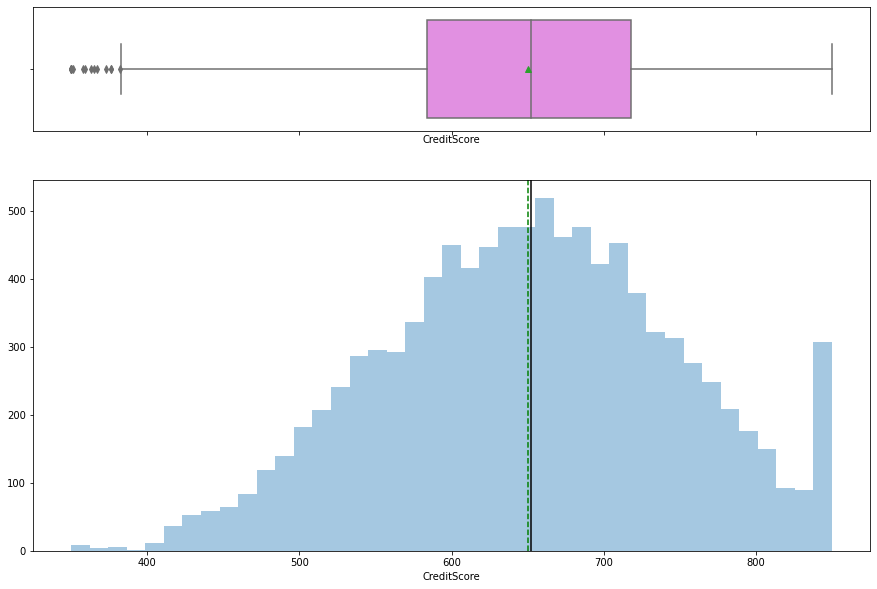

In [17]:
# CreditScore
histogram_boxplot(df['CreditScore'])

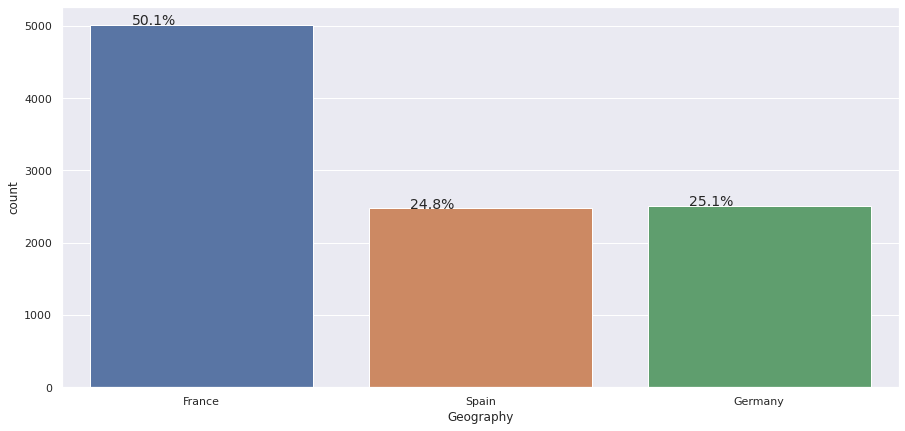

In [18]:
# Geography
perc_on_bar(df['Geography'])

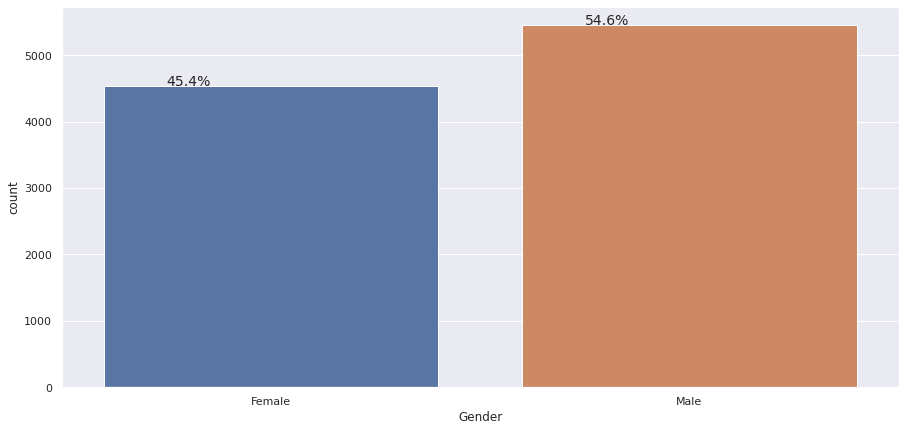

In [19]:
# Gender
perc_on_bar(df['Gender'])

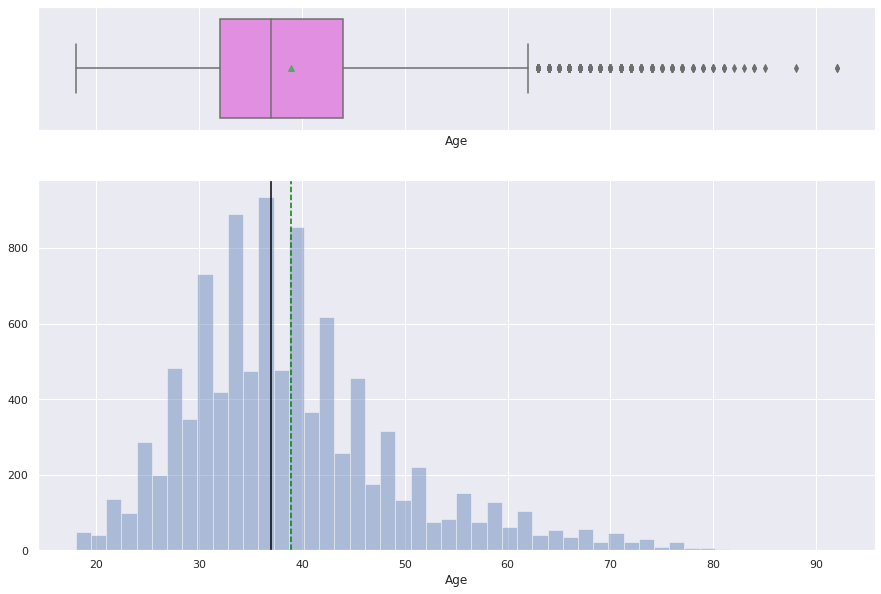

In [20]:
# Age
histogram_boxplot(df['Age'])

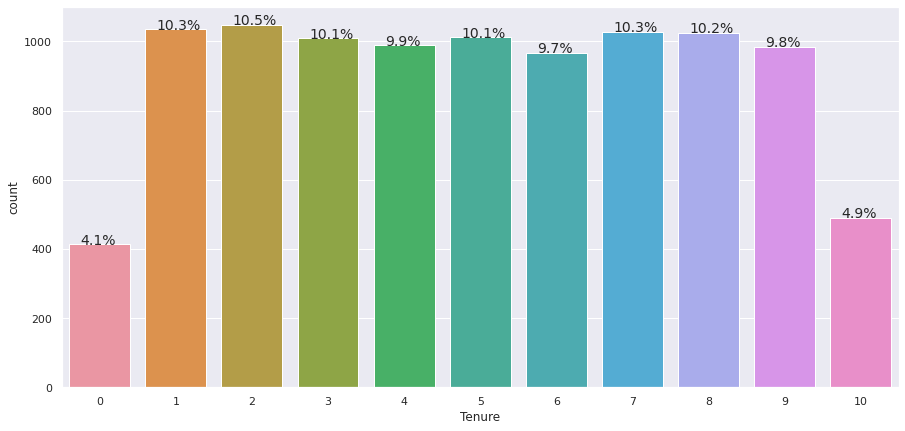

In [21]:
# Tenure
perc_on_bar(df['Tenure'])

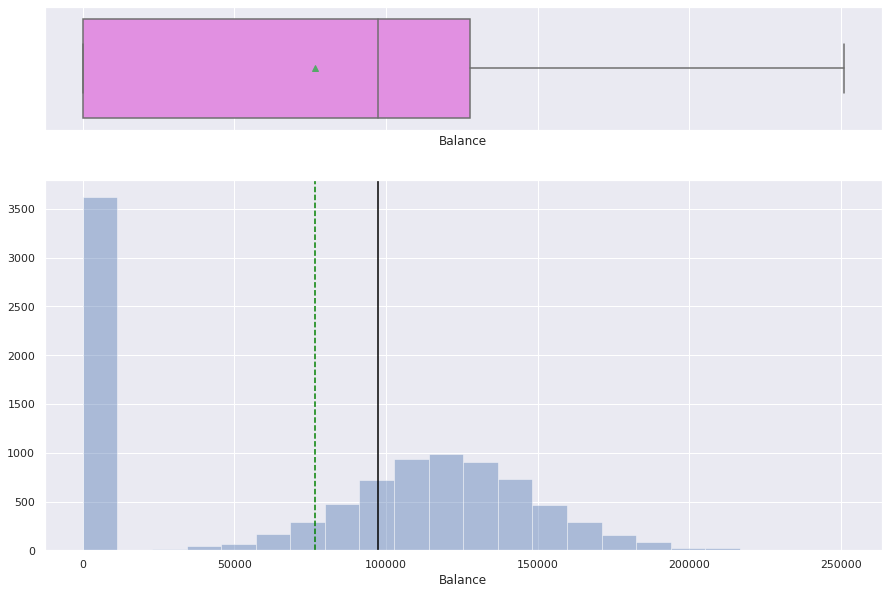

In [22]:
# Balance
histogram_boxplot(df['Balance'])

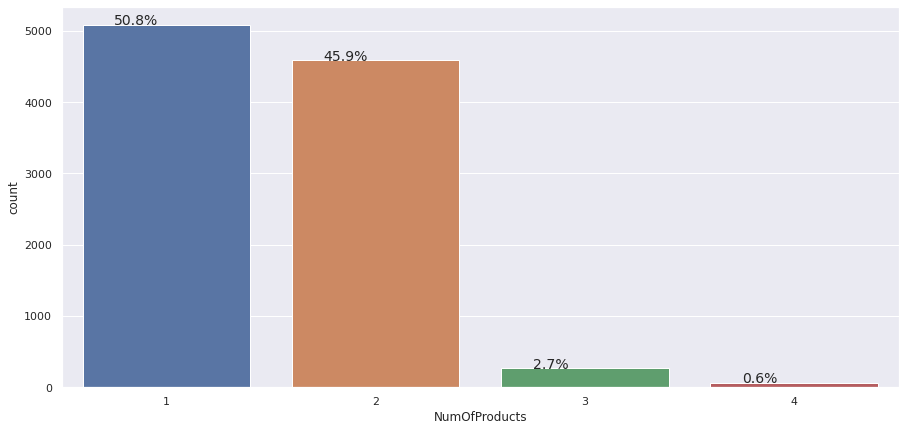

In [23]:
# NumOfProducts
perc_on_bar(df['NumOfProducts'])

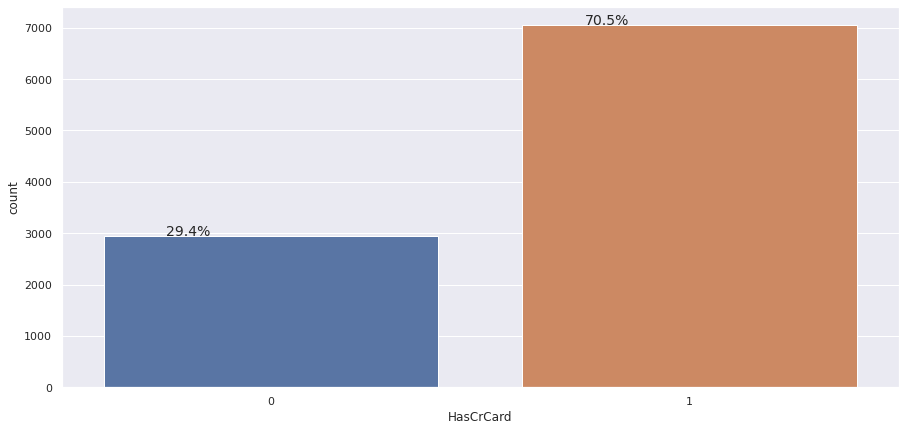

In [24]:
# HasCrCard
perc_on_bar(df['HasCrCard'])

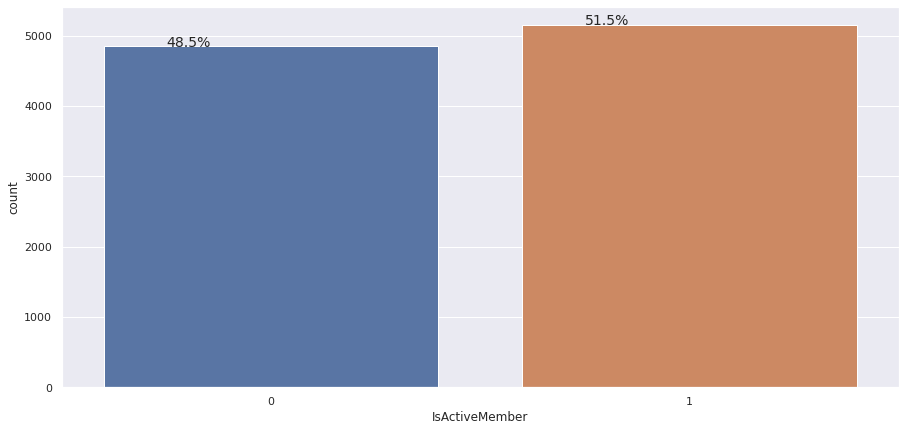

In [25]:
# IsActiveMember
perc_on_bar(df['IsActiveMember'])

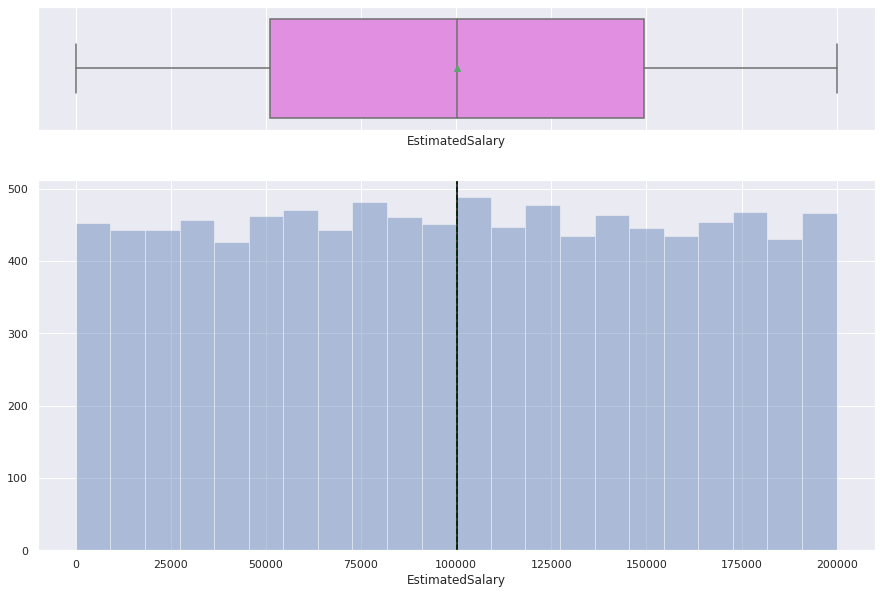

In [26]:
# EstimatedSalary
histogram_boxplot(df['EstimatedSalary'])

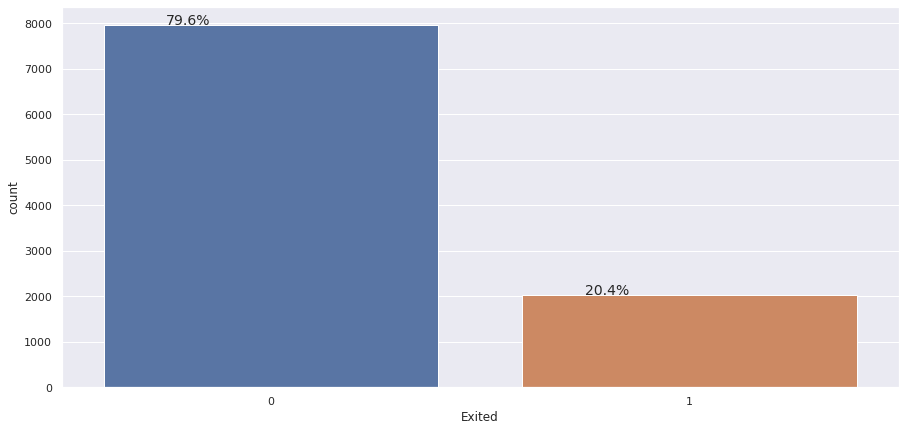

In [27]:
# Exited
perc_on_bar(df['Exited'])

#### Summary
 * Credit Score
  * Distribution is approximately Gaussian - with a large number of customers at the 850 credit score (which is the largest a score can be)
 * Geographic location of customers
  * ~50% France
  * ~25% German
  * ~25% Spain
 * Gender
  * ~55% Male
  * ~45% Female
 * Age
  * Distribution is approximately Gaussian - with skew towards older customers
 * Tenure  
  * Even distribution of customers for Tenure = 1 through 9 years (~10% customers in each year)
  * Approximately 5% of customers at 0 and 10 years Tenure (Min and Max, respectively)
 * Balance
  * Distribution is approximately Gaussian - with large number of customers at 0 credit balance.
 * NumOfProducts 
  * Most customers only have 1 or 2 products (~51% and ~46%, respectively)
  * Very few have more than 3 or 4 products (~2.5% and ~.5% respectively)
 * HasCrCard 
  * Most customers have a credit card with the bank (~70%)
  * 30% do not have a credit card with the bank
 * IsActiveMember
  * Approximately half of the customers are active vs. not active 
 * EstimatedSalary
  * Even distribution of customers for salary ranges 
 * Exited
  * Most customers stayed with bank (~80%)
  * 20% left the bank

#### <b>Bi-variate</b>

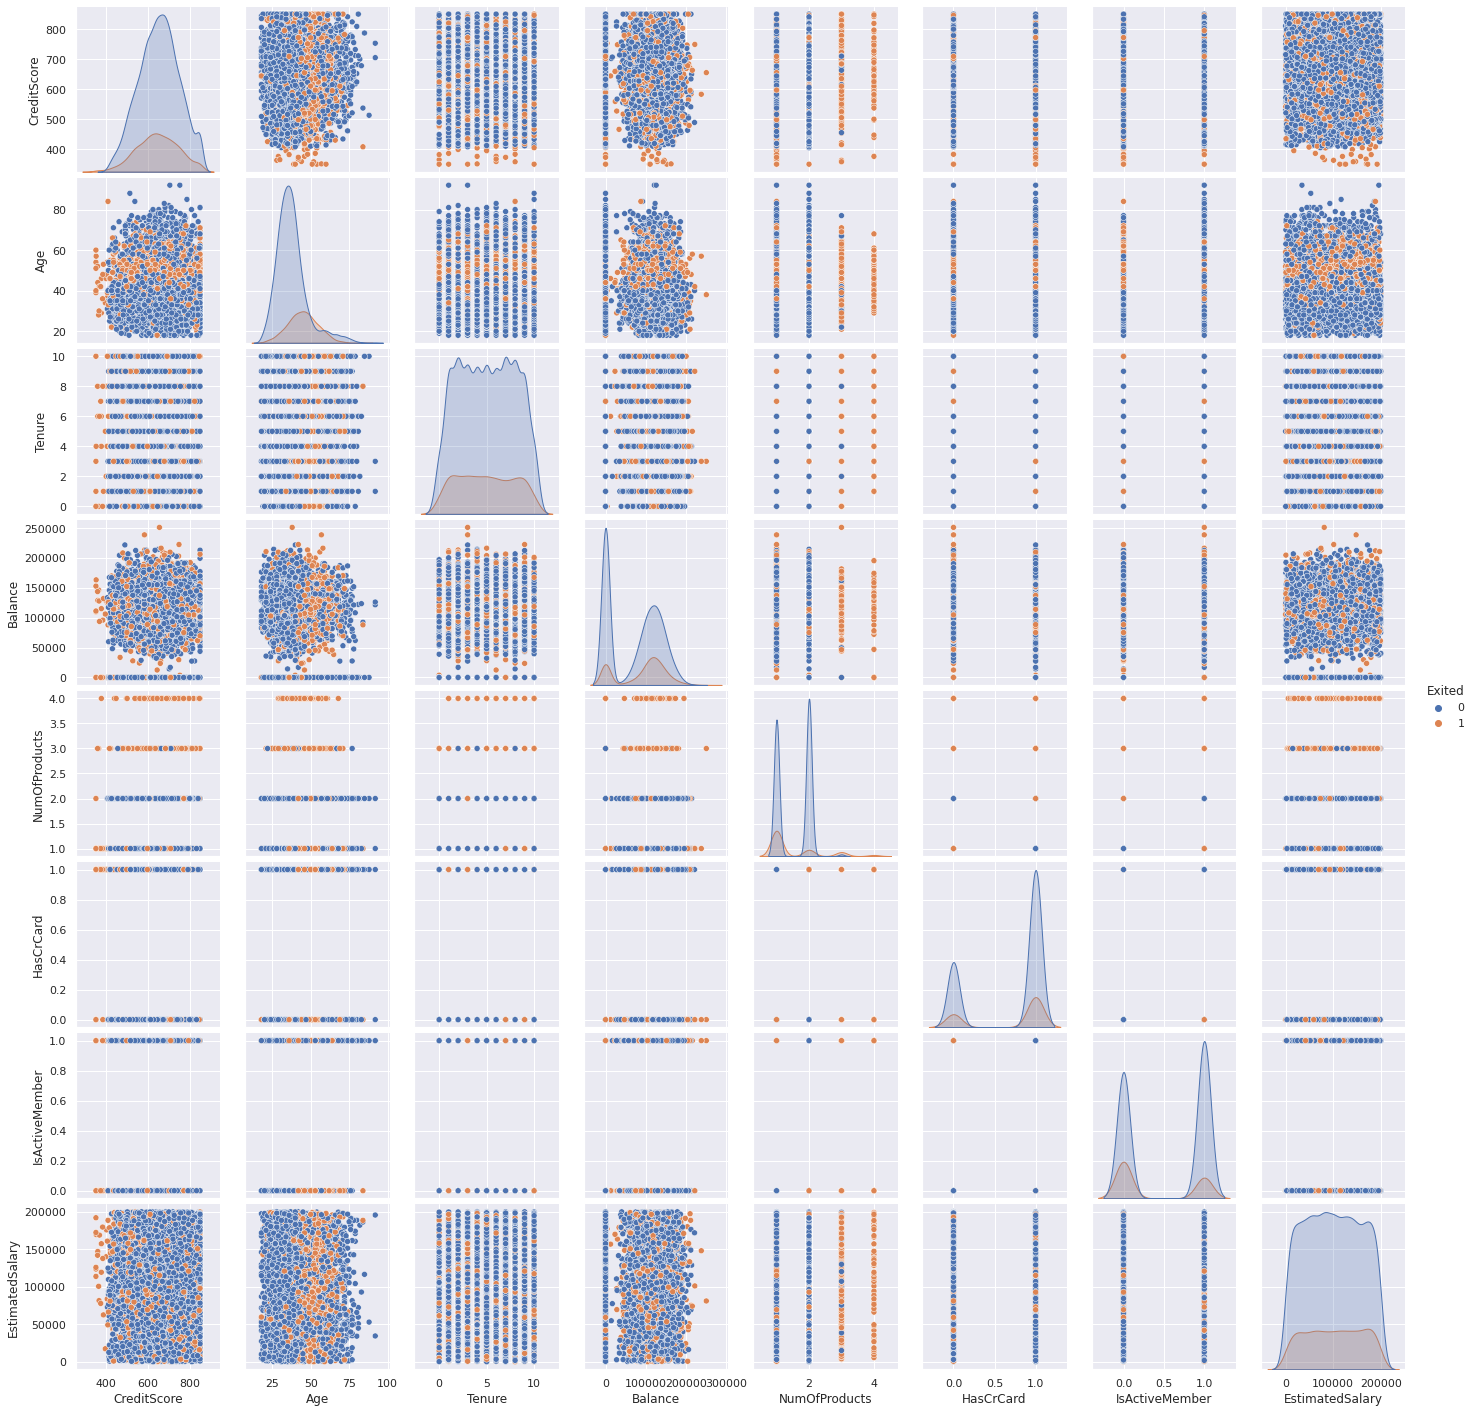

In [28]:
#Pairplot only continuous features to get basic feel
sns.pairplot(data=df, hue='Exited')
plt.show()

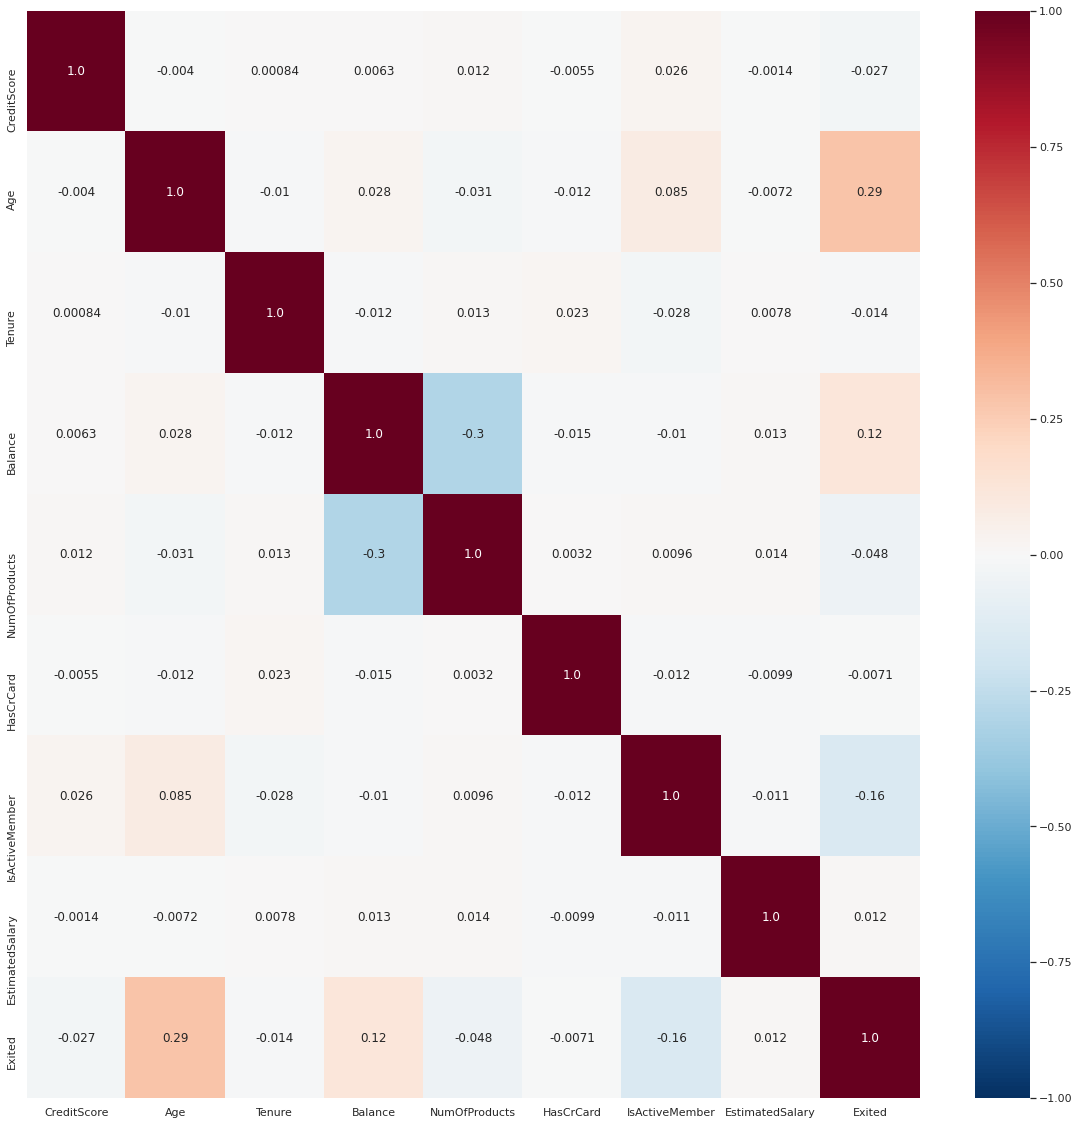

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2", cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

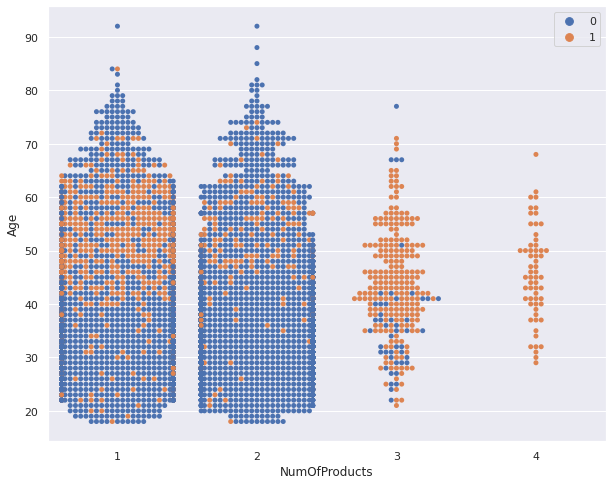

In [30]:
# NumOfProducts vs. Age (Exited)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='NumOfProducts', y='Age',hue='Exited')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
#ax.set_xlim([0, 40])

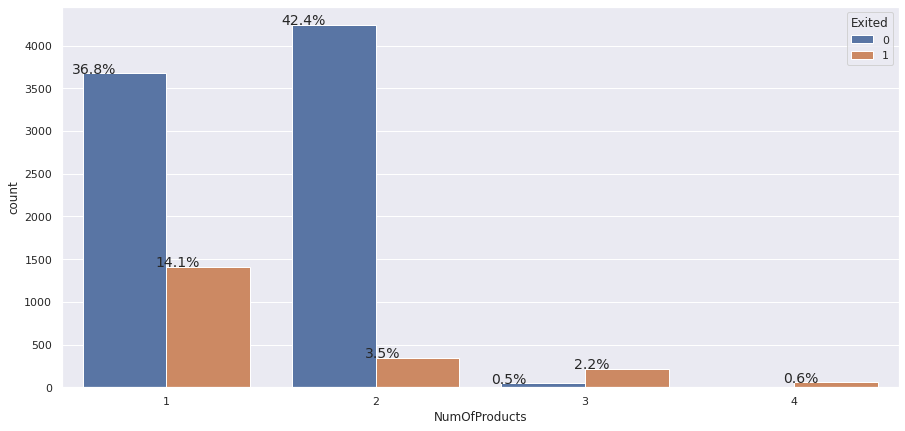

In [31]:
perc_on_bar_hue(df['NumOfProducts'])

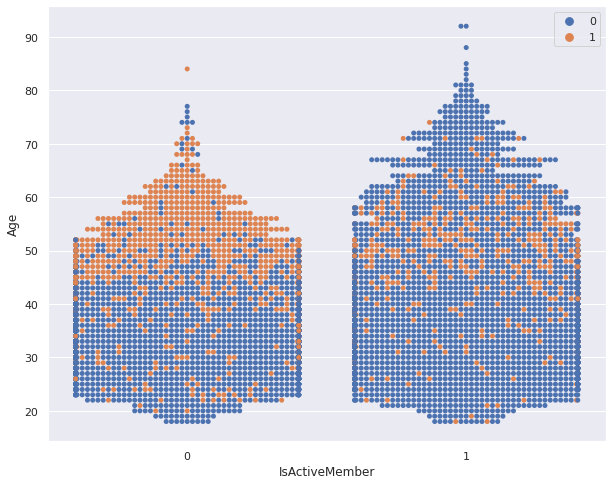

In [32]:
# IsActiveMember vs. Age (Exited)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='IsActiveMember', y='Age',hue='Exited')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
#ax.set_xlim([0, 40])

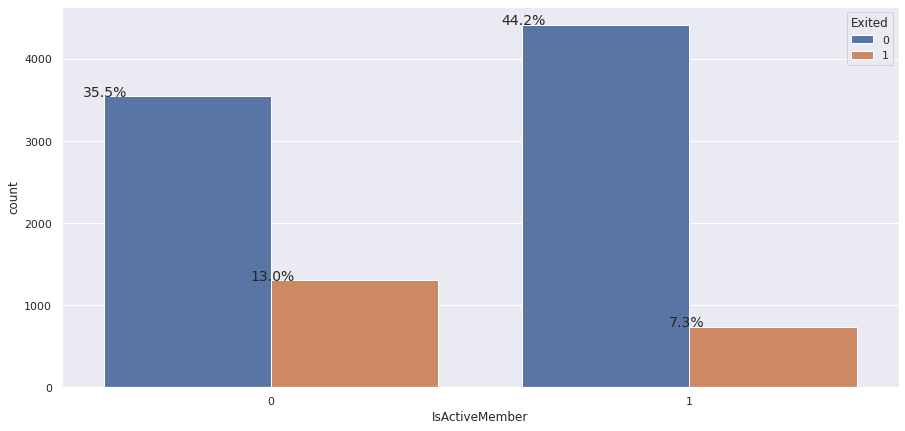

In [33]:
perc_on_bar_hue(df['IsActiveMember'])

### Illustrate the insights based on EDA (5)
-Key meaningful observations from Bivariate analysis

  * No apparent strong correlations between each pair of variables
  * The distribution of those who Exited appears to mirror those who stayed with bank for each variable except for Age and NumOfProducts
   * Age - There appears to be a disproportionate number of customers exiting the bank centered around ~50 years of age
   * NumOfProducts - A much larger percentage of customers exited vs. stayed with 3 or more products. 20% of all total customers exited, but:
     * Approx. 70% of those exiting customers had 1 product (~28% of total customers with 1 product)
     *  Approx. 17.5% of those exiting customers had 2 products (~8% of total customers with 2 products)
     * Approx. 11% of those exiting customers had 3 products (~80% of total customers with 3 products)
     * All customers with 4 products exited
   * No apparent outliers/issues that need to be dealt with in pre-processing
  * Target:
   * Customers with greater than 2 products
   * Customers with 1 or 2 products in the age range of 40 to 65 years AND not an Active Member
   * Customers with Credit Scores below 400
  

### Data Pre-processing (10)
- Split the target variable and predictors 
- Split the data into train and test 
- Rescale the data

In [34]:
df_orig=df

In [35]:
#creating dummy variables for the categorical features
df = pd.get_dummies(df_orig,drop_first=False)
df = df.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


In [36]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float32
 1   Age                10000 non-null  float32
 2   Tenure             10000 non-null  float32
 3   Balance            10000 non-null  float32
 4   NumOfProducts      10000 non-null  float32
 5   HasCrCard          10000 non-null  float32
 6   IsActiveMember     10000 non-null  float32
 7   EstimatedSalary    10000 non-null  float32
 8   Exited             10000 non-null  float32
 9   Geography_France   10000 non-null  float32
 10  Geography_Germany  10000 non-null  float32
 11  Geography_Spain    10000 non-null  float32
 12  Gender_Female      10000 non-null  float32
 13  Gender_Male        10000 non-null  float32
dtypes: float32(14)
memory usage: 547.0 KB


In [38]:
# Need to split off Exited Customers info - this is what we want to predict
X = df.drop('Exited', axis=1)
y = df[['Exited']]

print(X.head())
print(y.head())

   CreditScore   Age  Tenure  ...  Geography_Spain  Gender_Female  Gender_Male
0        619.0  42.0     2.0  ...              0.0            1.0          0.0
1        608.0  41.0     1.0  ...              1.0            1.0          0.0
2        502.0  42.0     8.0  ...              0.0            1.0          0.0
3        699.0  39.0     1.0  ...              0.0            1.0          0.0
4        850.0  43.0     2.0  ...              1.0            1.0          0.0

[5 rows x 13 columns]
   Exited
0     1.0
1     0.0
2     1.0
3     0.0
4     0.0


In [39]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1,stratify=y_train)


In [40]:
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.RobustScaler()
#scaler = preprocessing.MaxAbsScaler()

#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# create target scaler object
# target_scaler = preprocessing.StandardScaler()
#y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
#y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
#y_val = target_scaler.fit_transform(y_val.values.reshape(-1,1))

In [41]:
X_train

array([[0.7900001 , 0.13513514, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.85600007, 0.2027027 , 0.90000004, ..., 0.        , 1.        ,
        0.        ],
       [0.564     , 0.41891894, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.53999996, 0.24324325, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.668     , 0.25675675, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.36800003, 0.06756756, 0.5       , ..., 0.        , 1.        ,
        0.        ]], dtype=float32)

In [42]:
y_train

,Exited
5292,0.0
3879,1.0
6118,0.0
4044,0.0
3202,0.0
...,...
2644,0.0
7970,0.0
2746,0.0
8369,1.0


### Model building (10)
- Build Neural Network

In [43]:
#initialize the model
model = Sequential()

In [44]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=32, input_dim = 13,activation='relu'))   # input of 13 columns as shown above

# hidden layer
model.add(Dense(units=32,activation='relu'))

#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))  

In [45]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
______________________________________________________

In [47]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=500,epochs=100,validation_data=(X_val, y_val))

Epoch 1/100
13/13 [==============================] - 15s 59ms/step - loss: 0.7120 - recall: 0.7733 - val_loss: 0.6274 - val_recall: 0.3467
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5949 - recall: 0.2659 - val_loss: 0.5348 - val_recall: 0.1684
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5377 - recall: 0.1455 - val_loss: 0.5041 - val_recall: 0.1112
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5161 - recall: 0.1008 - val_loss: 0.4906 - val_recall: 0.0830
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5022 - recall: 0.0770 - val_loss: 0.4837 - val_recall: 0.0662
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4952 - recall: 0.0623 - val_loss: 0.4739 - val_recall: 0.0551
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4809 - recall: 0.0524 - val_loss: 0.4687 - val_recall: 0.0472
Epoch 8/100
13/13 [====================

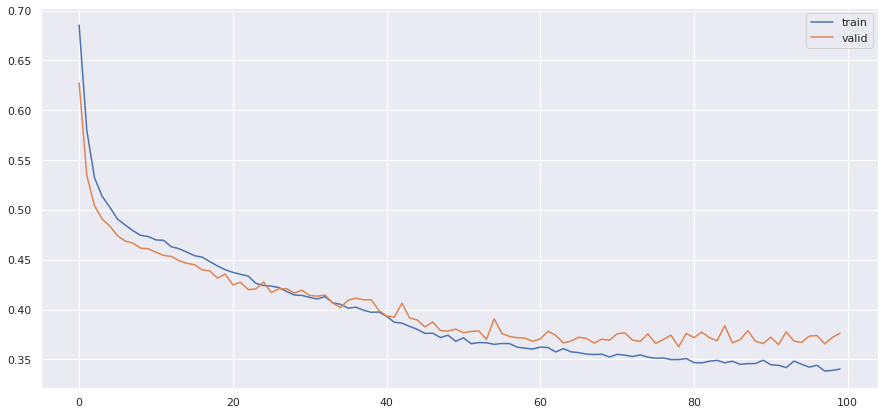

In [48]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [49]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

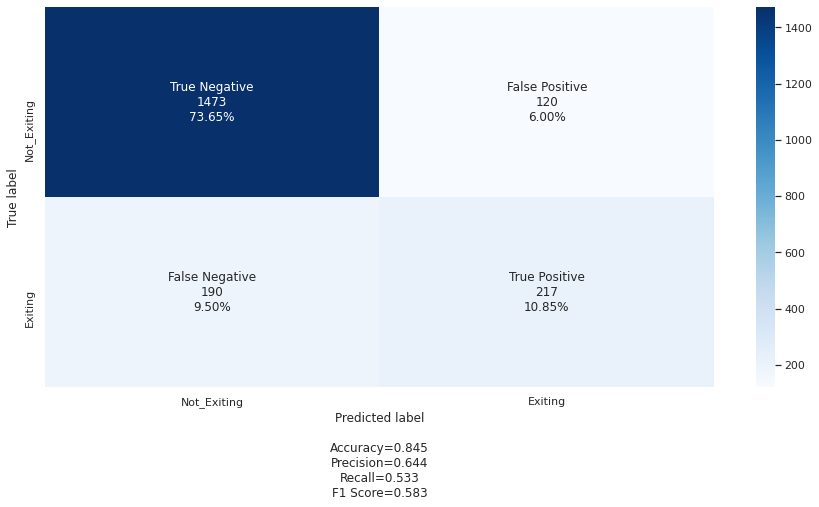

In [50]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm_orig=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm_orig, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Performance Improvement (15)
- Comment on which metric is right for model performance evaluation and why? 
- Find the optimal threshold using ROC-AUC or Precision-Recall curves 
- Comment on model performance 
- Can model performance be improved? check and comment 
- Build another model to implement these improvements 
- Include all the model which were trained to reach at the final one

#### <b>Right Metric</b>
 Ranked metrics (in order of most right for this model):
  * Recall
  * Precision
  * Accuracy 

The reason for the above ranking, is that we want to minimize the number of False Negatives first (hence Recall being most right). However, we do not want to do this at a cost of significantly increasing our False Postives (hence why Precision is second most right). There are far too many customers who are not leaving the bank, so Accuracy score can be very misleading (hence it's rank at last).

#### <b>Optimal Threshold using ROC-AUC and Precision-Recall Curves</b>

In [51]:
y_pred_df = pd.DataFrame(y_pred, columns=list('p'))
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test['Exited'].to_numpy(), y_pred_df['p'].to_numpy())
precision_rate1, recall_rate1, _ = precision_recall_curve(y_test['Exited'].to_numpy(), y_pred_df['p'].to_numpy())
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test['Exited'].to_numpy(), y_pred_df['p'].to_numpy()))

roc_auc_score for DecisionTree:  0.8350785299937842


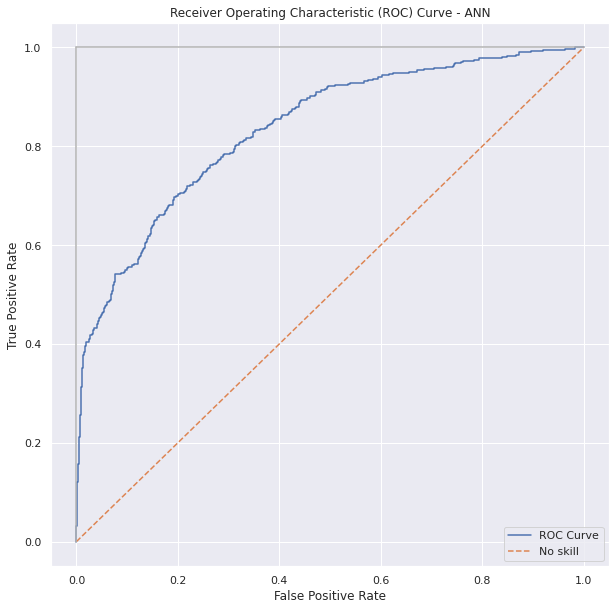

In [52]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC) Curve - ANN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC Curve','No skill'])
plt.show()

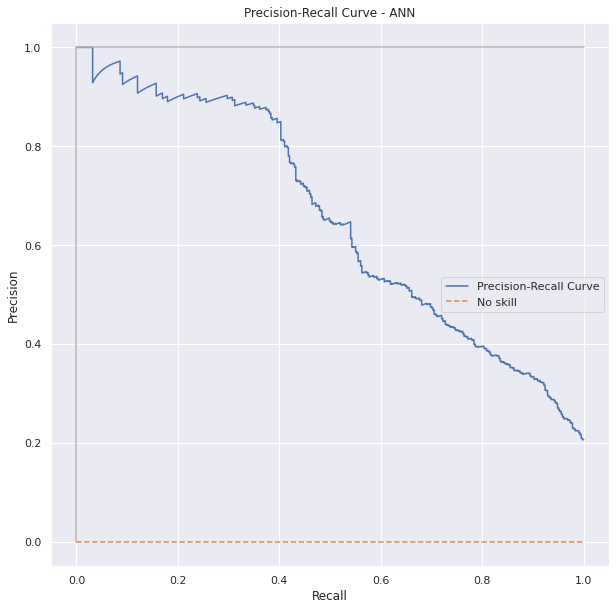

In [53]:
plt.subplots(1, figsize=(10,10))
plt.title('Precision-Recall Curve - ANN')
plt.plot(recall_rate1, precision_rate1)
plt.plot([0, 0], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(['Precision-Recall Curve','No skill'])
plt.show()

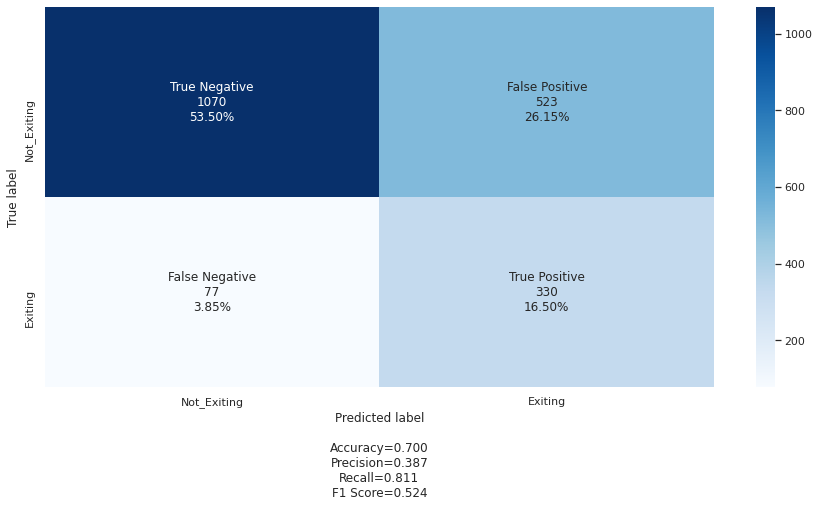

In [54]:
## Confusion Matrix on unseen test set
for i in range(len(y_test)):
    if y_pred[i]>0.2:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm_threshold=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm_threshold, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

A threshold of ~0.2 appears to be the "best" threshold based on the AUC-ROC and Precision-Recall Curves - and we do get Recall up to ~80% (from 55%) - but at a pretty big detriment to the Precision (which was just above 60%, but now at 40%).

#### <b>Model Performance</b>

 * Model performance - even with adjustments to the threshold - is mediocre, at best. Still too many False Negatives and way too many False Postives. 



#### <b>Model Improvement</b>

 * The above model represents the best after trying the following tests:
  * Preprocessing scalars:
    * StandardScaler()
    * MinMaxScaler() <--- Chosen
    * RobustScaler()
    * MaxAbsScaler()
  * Optimizers
    * SGD
    * RMSProp
    * Adam <--- Chosen
    * Adamax
  * Losses
    * binary_crossentropy <--- Chosen
    * mean_squared_error
    * huber
    * log_cosh
  * Hidden Layers
    * 1 and units = 13, 16, 26, 32, 64, 128
    * 2 (with and without dropouts) and units = 13, 16, 26, 32, 64, 128
    * 3 ([with] and without dropouts) and units = 13, 16, 26, [32], 64, 128  <--- Chosen
  * Batch size
    * 15
    * 20
    * 50
    * 100
    * 500  <--- Chosen
* The Frustrating part is that scores similar to the ones obtained with the "best" model (with the starting threshold at 0.50) are obtained by simply following the "target customer" determined during the EDA process. See below result when target customer is only criteria:



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)
y_pred_basic = np.where((X_test['NumOfProducts'].values > 2) | 
                        (X_test['CreditScore'].values < 400) |  
                        ((X_test['NumOfProducts'].values < 3) & (X_test['IsActiveMember'].values < 0.5) & (X_test['Age'].values < 65) & (X_test['Age'].values > 40))
                        ,1,0)

y_pred_basic

array([0, 0, 0, ..., 0, 0, 0])

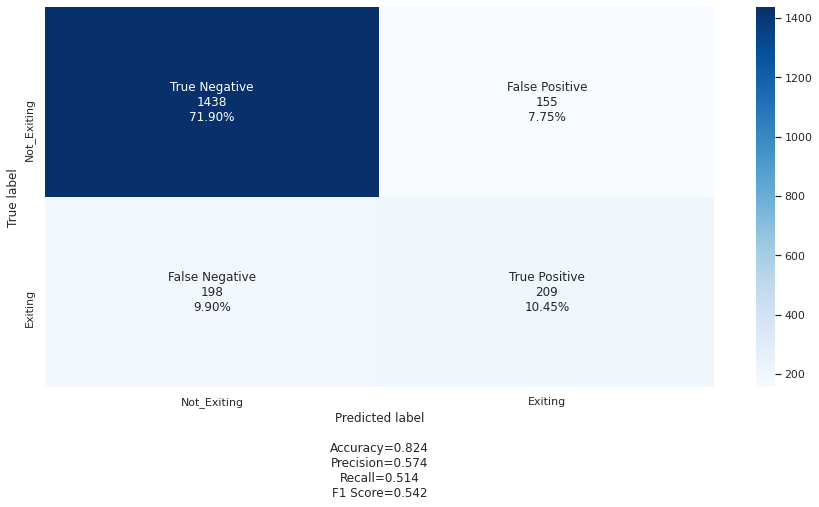

In [56]:
cm_manual=confusion_matrix(y_test, y_pred_basic)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm_manual, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Compare to the original CM with threshold = 0.5

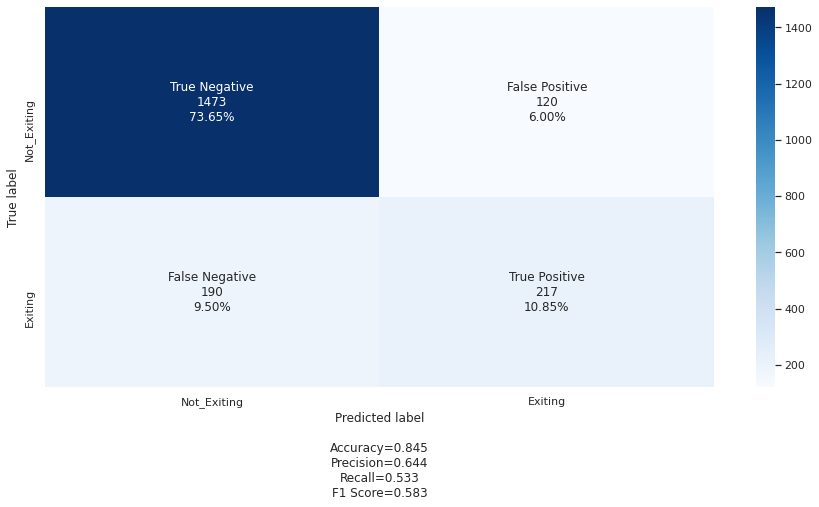

In [57]:
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm_orig, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Not much better!

#### <b>Random Forest Classifier</b>

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)

In [59]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_pred_rf = random_forest.predict(X_test)

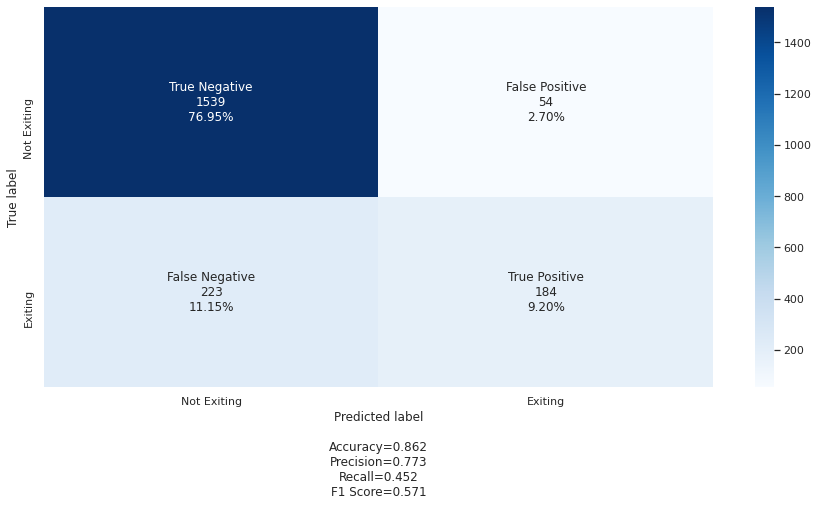

In [61]:


cm_rf=confusion_matrix(y_test, y_pred_rf)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm_rf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Also, not that good. Recall is below 0.5

#### <b>Recursive Feature Elimination</b>


In [62]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=8)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True  True False  True False  True  True
  True]
[4 1 3 5 1 1 1 6 1 2 1 1 1]


In [63]:
col_names = X_train.columns
col_names[rfe.support_]

Index(['Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [64]:
# Need to split off Exited Customers info - this is what we want to predict
X_rfe = df[['Age','NumOfProducts','HasCrCard','IsActiveMember','Geography_France','Geography_Spain','Gender_Female','Gender_Male']]
y_rfe = df[['Exited']]

print(X_rfe.head())
print(y_rfe.head())

    Age  NumOfProducts  HasCrCard  ...  Geography_Spain  Gender_Female  Gender_Male
0  42.0            1.0        1.0  ...              0.0            1.0          0.0
1  41.0            1.0        0.0  ...              1.0            1.0          0.0
2  42.0            3.0        1.0  ...              0.0            1.0          0.0
3  39.0            2.0        0.0  ...              0.0            1.0          0.0
4  43.0            1.0        1.0  ...              1.0            1.0          0.0

[5 rows x 8 columns]
   Exited
0     1.0
1     0.0
2     1.0
3     0.0
4     0.0


In [65]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.20, random_state=1,stratify=y)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1,stratify=y_train)


In [66]:
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.RobustScaler()
#scaler = preprocessing.MaxAbsScaler()

#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# create target scaler object
# target_scaler = preprocessing.StandardScaler()
#y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
#y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
#y_val = target_scaler.fit_transform(y_val.values.reshape(-1,1))

In [67]:
#initialize the model
model_rfe = Sequential()

In [68]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_rfe.add(Dense(units=32, input_dim = 8,activation='relu'))   # input of 13 columns as shown above

# hidden layer
model_rfe.add(Dense(units=32,activation='relu'))

#Adding Dropout to prevent overfitting 
model_rfe.add(Dropout(0.5))
model_rfe.add(Dense(32,activation='relu'))
model_rfe.add(Dense(32,activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_rfe.add(Dense(1,activation='sigmoid'))  

In [69]:
# Create optimizer with default learning rate
# Compile the model
model_rfe.compile(optimizer='Adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

In [70]:
model_rfe.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
____________________________________________________

In [71]:
#fitting the model
history=model_rfe.fit(X_train,y_train,batch_size=500,epochs=100,validation_data=(X_val, y_val))

Epoch 1/100
13/13 [==============================] - 2s 39ms/step - loss: 0.6352 - recall_1: 0.1278 - val_loss: 0.5575 - val_recall_1: 0.0267
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5434 - recall_1: 0.0201 - val_loss: 0.5065 - val_recall_1: 0.0129
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5307 - recall_1: 0.0111 - val_loss: 0.4955 - val_recall_1: 0.0085
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5034 - recall_1: 0.0077 - val_loss: 0.4900 - val_recall_1: 0.0064
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4956 - recall_1: 0.0059 - val_loss: 0.4804 - val_recall_1: 0.0051
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4931 - recall_1: 0.0048 - val_loss: 0.4750 - val_recall_1: 0.0042
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4889 - recall_1: 0.0040 - val_loss: 0.4721 - val_recall_1: 0.0036
Epoch 8/100


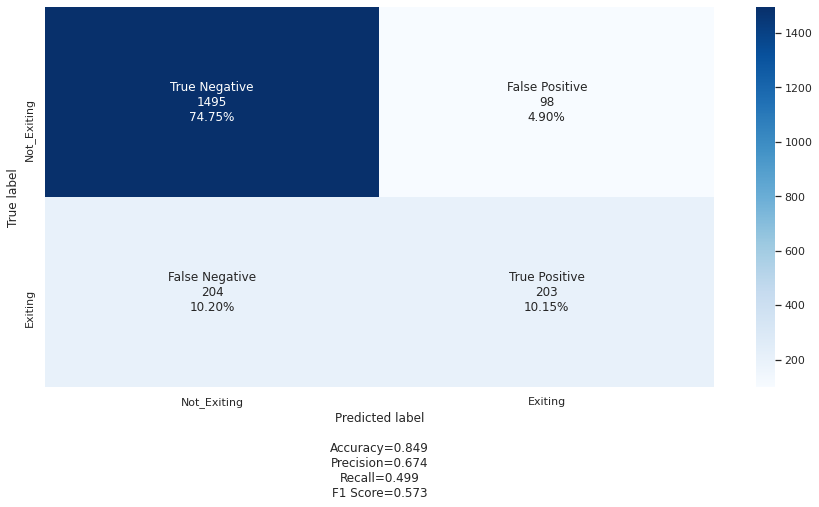

In [72]:
## Confusion Matrix on unseen test set
y_pred = model_rfe.predict(X_test)
y_pred_rfe = model_rfe.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred_rfe[i]=1 
    else:
        y_pred_rfe[i]=0



cm_rfe=confusion_matrix(y_test, y_pred_rfe)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm_rfe, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Similar results with RFE. Recall is right at 0.5

### Model Performance Evaluation (5)
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement



Model performance is pretty mediocre - This problem is probably better suited as a Machine Learning problem using Ensemble Techniques rather than a Deep Learning problem using ANN. I suspect with different enemble techniques and rigorous parameter testing, the could be better performance there.

Not much in the way of improvement was found after the initial wave of tests. I am eager to see what performance of other students are.

### Conclusion and key takeaways (2.5)
- Final conclusion about the analysis

Again, with the model performance being mediocre (at best) I would not recommend using ANN for predicting banking customer behavior based on the training data provided. There are other ensemble techniques that would likely be better suited at handling this problem. Otherwise, other key data may be required to use ANN's to solve this problem.